In [15]:
import os
from collections import defaultdict
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
dataset_path ='chest_xray'

In [17]:
subfolders = ["train"]

In [18]:
classes = ['PNEUMONIA', 'NORMAL']

In [19]:
image_counts = defaultdict(lambda: defaultdict(int))

In [20]:
for subfolder in subfolders:
    for class_name in ["PNEUMONIA", "NORMAL"]:
        class_path = os.path.join(dataset_path, subfolder, class_name)
        image_counts[subfolder][class_name] = len(os.listdir(class_path))


In [21]:
counts = {}

In [22]:
for subfolder in subfolders:
    print(f"Counts for {subfolder}:")
    for class_name in ["PNEUMONIA", "NORMAL"]:
        print(f" - {class_name}: {image_counts[subfolder][class_name]}")
        counts[class_name] = image_counts[subfolder][class_name]


Counts for train:
 - PNEUMONIA: 3876
 - NORMAL: 1342


In [23]:
counts

{'PNEUMONIA': 3876, 'NORMAL': 1342}

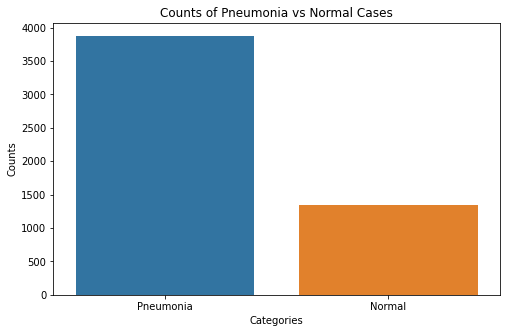

In [24]:
categories = ['Pneumonia', 'Normal']
num = [counts['PNEUMONIA'], counts['NORMAL']]

# Convert data to a pandas DataFrame
data = pd.DataFrame({
    'Category': categories,
    'Count': num
})

# Create a bar plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Count', data=data,)

# Adding titles and labels
plt.title('Counts of Pneumonia vs Normal Cases')
plt.xlabel('Categories')
plt.ylabel('Counts')

# Show the plot
plt.show()

In [25]:
normal_train_path = os.path.join(dataset_path, "train", "NORMAL")
print(normal_train_path)

chest_xray\train\NORMAL


In [26]:
pneumonia_count = 3876
normal_count = 1342
images_to_generate = pneumonia_count - normal_count

In [27]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [28]:
normal_images = os.listdir(normal_train_path)
generated_count = 0

In [29]:
normal_images.pop(0)

'.DS_Store'

In [30]:
for img_name in normal_images:
    img_path = os.path.join(normal_train_path, img_name)
    print(img_path)
    img = load_img(img_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    # Generating images
    for _ in datagen.flow(x, batch_size=1, save_to_dir=normal_train_path, save_prefix='aug', save_format='jpeg'):
        generated_count += 1
        if generated_count >= images_to_generate:
            break

    if generated_count >= images_to_generate:
        break

print(f"Generated {generated_count} images in the NORMAL class.")

chest_xray\train\NORMAL\IM-0115-0001.jpeg


Generated 2534 images in the NORMAL class.


In [37]:
for subfolder in subfolders:
    for class_name in ["PNEUMONIA", "NORMAL"]:
        class_path = os.path.join(dataset_path, subfolder, class_name)
        image_counts[subfolder][class_name] = len(os.listdir(class_path))

In [38]:
new_counts = {}

In [39]:
for subfolder in subfolders:
    print(f"Counts for {subfolder} after balancing:")
    for class_name in ["PNEUMONIA", "NORMAL"]:
        print(f" - {class_name}: {image_counts[subfolder][class_name]}")
        new_counts[class_name] = image_counts[subfolder][class_name]

Counts for train after balancing:
 - PNEUMONIA: 3876
 - NORMAL: 3587


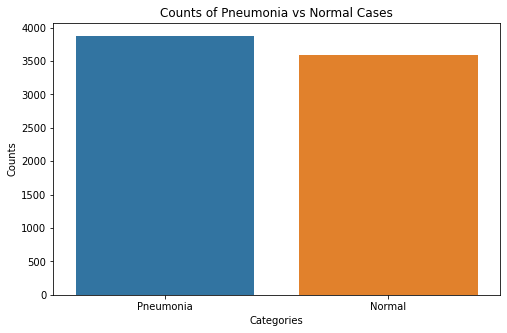

In [40]:
categories = ['Pneumonia', 'Normal']
num = [new_counts['PNEUMONIA'], new_counts['NORMAL']]

# Convert data to a pandas DataFrame
data = pd.DataFrame({
    'Category': categories,
    'Count': num
})

# Create a bar plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Count', data=data,)

# Adding titles and labels
plt.title('Counts of Pneumonia vs Normal Cases')
plt.xlabel('Categories')
plt.ylabel('Counts')

# Show the plot
plt.show()